In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import math

In [2]:
T = 100
N = 100
b = 3
x,y,z = np.zeros([T,N+1]),np.zeros([T,N+1]),np.zeros([T,N+1])
with open(f'simulation_FJC_b=3.0_N=100_T=100.xyz','r') as f:
    for t in range(T):
        line1 = f.readline()
        line2 = f.readline()
        for i in range(N+1):
            data = f.readline()
            values = data.split( )
            x[t,i] = float(values[1])
            y[t,i] = float(values[2])
            z[t,i] = float(values[3])

In [3]:
np.sqrt((x[1,:]-x[1,:])**2 + (y[1,:]-y[1,:])**2 + (z[1,:]-z[1,:])**2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
K = np.linspace(0,0.2,100)
R = []
for t in range(T):
    r = np.zeros([N,N])
    for i in range(N):
        for j in range(i):
            r[i][j] = math.sqrt((x[t,i]-x[t,j])**2 + (y[t,i]-y[t,j])**2 + (z[t,i]-z[t,j])**2)
            r[j][i] = r[i][j]
    R.append(r)

In [14]:
I = []
for k in K:
    a = []
    for r in R:
        i = np.sin(k*r)/(k*r)
        i = np.nan_to_num(i)
        a.append(i)
    I.append(np.mean(a))

/tmp/ipykernel_1071/2886671435.py:5: RuntimeWarning: invalid value encountered in divide
  i = np.sin(k*r)/(k*r)


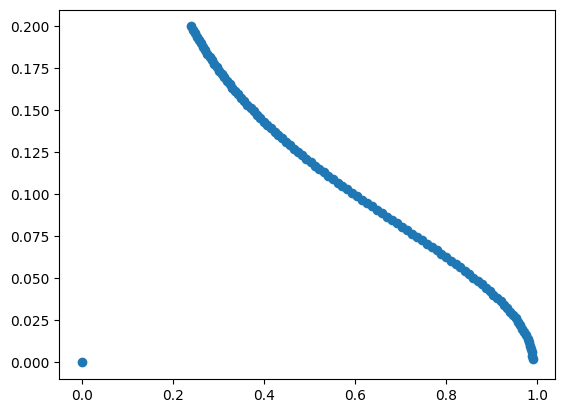

In [18]:
plt.scatter(I,K)

In [7]:
Rg_2 = []
for i in range(T):
    x_cm = np.mean(x[i,:])
    y_cm = np.mean(y[i,:])
    z_cm = np.mean(z[i,:])
    r = np.mean((x[i,:]-x_cm)**2 + (y[i,:]-y_cm)**2 + (z[i,:]-z_cm)**2)
    Rg_2.append(r)

In [21]:
I_theory = []
for k in K:
    a = []
    for r in Rg_2:
        i = (N+1)**2 *(1-(k*r)**2/3)
        a.append(i)
    I_theory.append(np.mean(a))

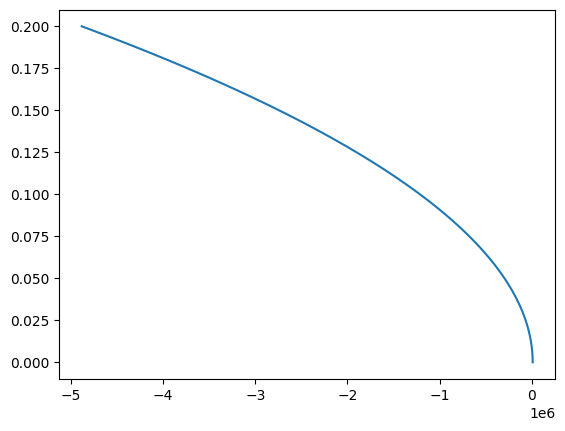

In [22]:
plt.plot(I_theory,K)